<a href="https://colab.research.google.com/github/anjalijadhav002/Zeotap_Datascience_Task/blob/main/anjali_jadhav_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Dataset Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Overview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Overview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54     

<ipython-input-6-ff386a9ea2a7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


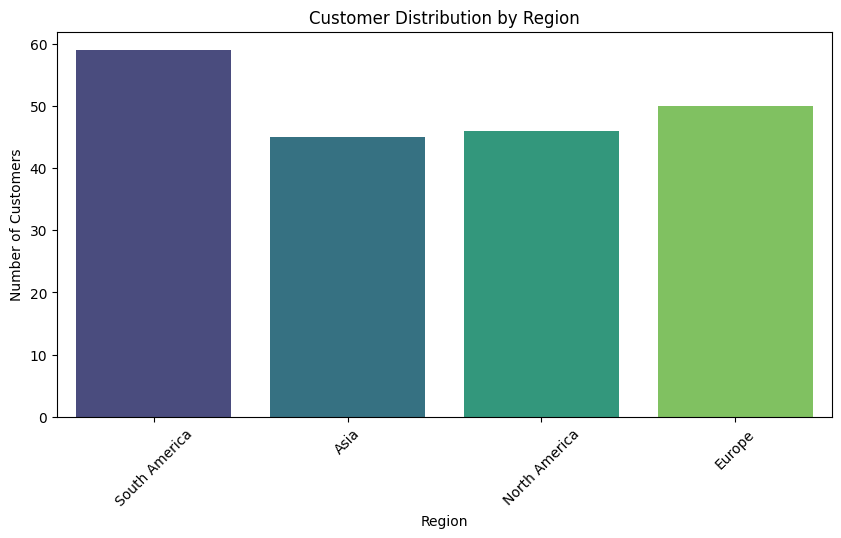

<ipython-input-6-ff386a9ea2a7>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products, palette='coolwarm')


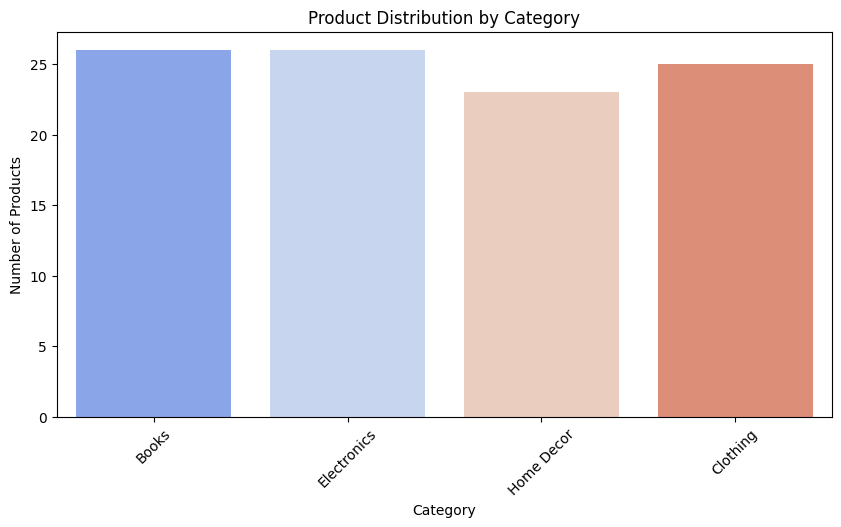

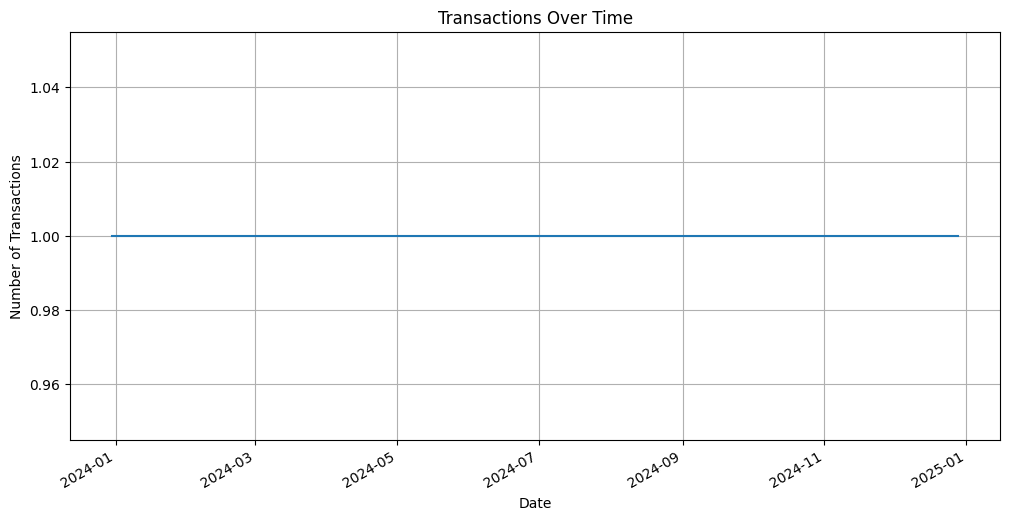

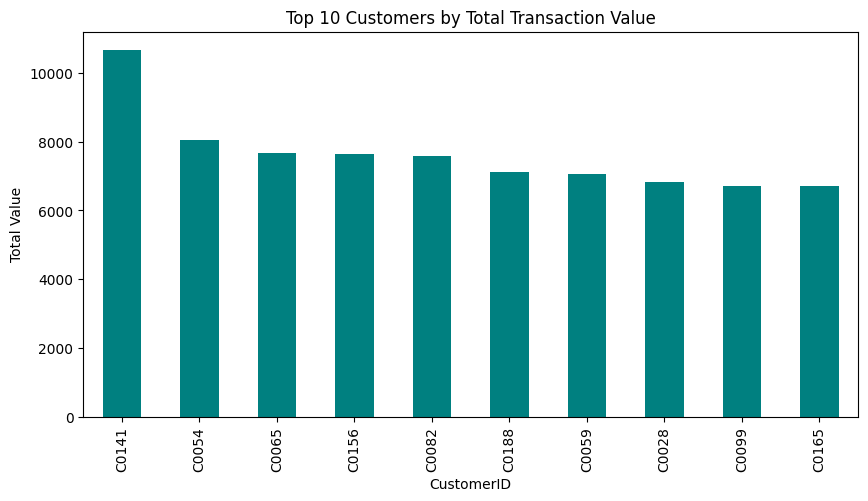

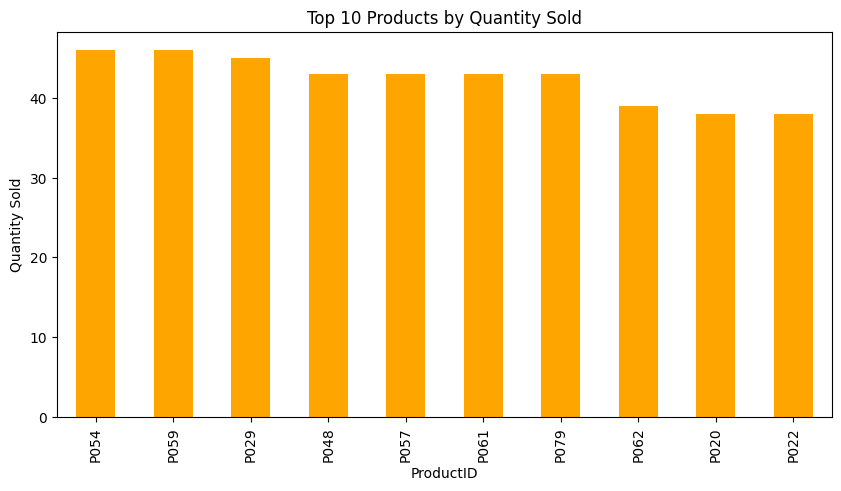

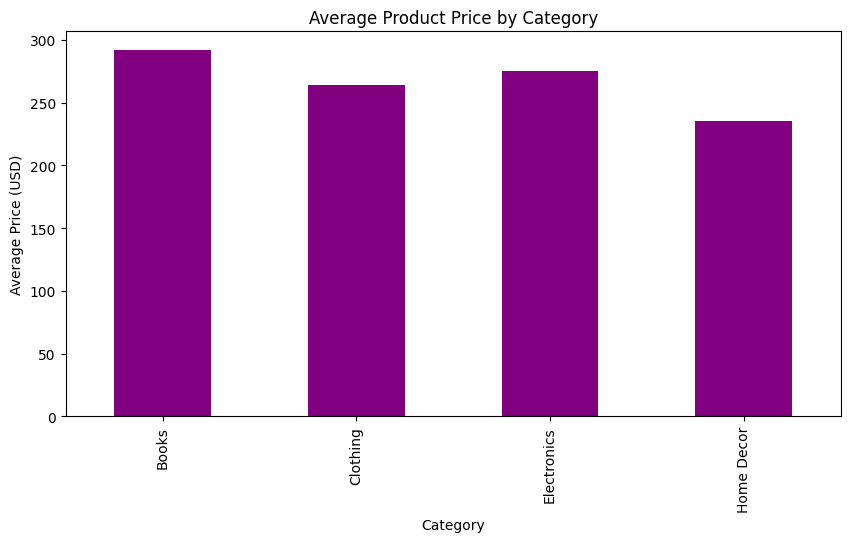


Business Insights:
1. The majority of customers come from a specific region, highlighting a key target market.
2. Some product categories dominate in sales, indicating popular products.
3. Transaction activity shows seasonal trends, which can guide marketing campaigns.
4. A small number of customers contribute significantly to total sales (Top 10 customers).
5. Certain products are sold in bulk, which can indicate opportunities for promotional bundles.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

print("Customers Dataset Overview:")
print(customers.head())

print("\nProducts Dataset Overview:")
print(products.head())

print("\nTransactions Dataset Overview:")
print(transactions.head())

print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=products, palette='coolwarm')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_by_date = transactions.groupby('TransactionDate').size()

plt.figure(figsize=(12, 6))
transactions_by_date.plot()
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='teal')
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Value")
plt.show()

top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='orange')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.show()


avg_price_by_category = products.groupby('Category')['Price'].mean()

plt.figure(figsize=(10, 5))
avg_price_by_category.plot(kind='bar', color='purple')
plt.title("Average Product Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (USD)")
plt.show()


print("\nBusiness Insights:")
print("1. The majority of customers come from a specific region, highlighting a key target market.")
print("2. Some product categories dominate in sales, indicating popular products.")
print("3. Transaction activity shows seasonal trends, which can guide marketing campaigns.")
print("4. A small number of customers contribute significantly to total sales (Top 10 customers).")
print("5. Certain products are sold in bulk, which can indicate opportunities for promotional bundles.")